# House Price Competition

In [828]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [829]:
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

from sklearn import metrics

In [830]:
import pandas as pd
import numpy as np

In [831]:
import math

## Data Preperation

In [988]:
import os

In [990]:
PATH = ""

In [991]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False)
test = pd.read_csv(f'{PATH}test.csv', low_memory=False)


print(df_raw.shape, test.shape)

(1460, 81) (1459, 80)


In [992]:
len(test)

1459

In [993]:
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [838]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [839]:
display_all(df_raw.tail())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [699]:
display_all(df_raw.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [700]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [840]:
df_raw["SalePrice"] 

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Pre-processing

### Feature Engineering

In [841]:
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

### Creating Mapping For Categorical Variables

In [994]:
# It will convert columns that have string dtypes to pandas category type
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype("category").cat.as_ordered()

In [995]:
def apply_cats(df, train):
    for n, c in df.items():
        if train[n].dtype == "category":
            df[n] = pd.Categorical(c, categories = train[n].cat.categories, ordered = True)
            

In [996]:
df = df_raw.copy()

train = df.drop(columns='SalePrice')

In [997]:
train["MSZoning"] = train["MSZoning"].astype('category')
test["MSZoning"] = test["MSZoning"].astype('category')

In [998]:
train_cats(train)

In [999]:
train_cats(test)

In [1000]:
print(test.shape,train.shape)

(1459, 80) (1460, 80)


In [1001]:
train["MiscFeature"], train['MSZoning']

(0        NaN
 1        NaN
 2        NaN
 3        NaN
 4        NaN
         ... 
 1455     NaN
 1456     NaN
 1457    Shed
 1458     NaN
 1459     NaN
 Name: MiscFeature, Length: 1460, dtype: category
 Categories (4, object): [Gar2 < Othr < Shed < TenC],
 0       RL
 1       RL
 2       RL
 3       RL
 4       RL
         ..
 1455    RL
 1456    RL
 1457    RL
 1458    RL
 1459    RL
 Name: MSZoning, Length: 1460, dtype: category
 Categories (5, object): [C (all) < FV < RH < RL < RM])

In [1002]:
train["MSZoning"].unique()

[RL, RM, C (all), FV, RH]
Categories (5, object): [C (all) < FV < RH < RL < RM]

In [1003]:
# this will be the thing the random forest algorithm will see
# -1 is for missing value
# We will add 1 to all the values to 0 to represent missing values
train["MSZoning"].cat.codes

0       3
1       3
2       3
3       3
4       3
       ..
1455    3
1456    3
1457    3
1458    3
1459    3
Length: 1460, dtype: int8

### Very Fast Way to Save and Load Your File

In [1004]:
# feather is fast way to write to the disk and read it back
os.makedirs('tmp', exist_ok=True) # Don't give error if file is already there 
df.to_feather('tmp/house-price')

### Handling Missing Values

In [1005]:
display_all(train.isnull().sum().sort_index()/len(train))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [1006]:
pd.isnull(train["MiscFeature"])

0        True
1        True
2        True
3        True
4        True
        ...  
1455     True
1456     True
1457    False
1458     True
1459     True
Name: MiscFeature, Length: 1460, dtype: bool

In [1007]:
pd.isnull(train["MiscFeature"]).sum()

1406

In [1008]:
# Missing of the entry can also be a valuable information
# So we will create a column that is False when value is missing
# We encoded missingness in categorical columns so we will just create _na columns for numerical types
def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum:
            df[name+"_na"] = pd.isnull(col)
        df[name] = col.fillna(col.median())

In [1009]:
# We will have codes starting from 0 (for missing)
def numericalize(df, col, name):
    if is_string_dtype(col):
        df[name] = col.cat.codes+1

In [1010]:
def proc_df(df):
    for n, c in df.items():
        fix_missing(df, c, n)
        numericalize(df, c, n)
    return df

In [1011]:

train= proc_df(train); train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageArea_na,WoodDeckSF_na,OpenPorchSF_na,EnclosedPorch_na,3SsnPorch_na,ScreenPorch_na,PoolArea_na,MiscVal_na,MoSold_na,YrSold_na
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,False,False,False,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,False,False,False,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False


In [1012]:
test = proc_df(test)

In [1013]:
print(test.shape,train.shape)

(1459, 117) (1460, 117)


In [1014]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'GarageArea_na', 'WoodDeckSF_na', 'OpenPorchSF_na', 'EnclosedPorch_na',
       '3SsnPorch_na', 'ScreenPorch_na', 'PoolArea_na', 'MiscVal_na',
       'MoSold_na', 'YrSold_na'],
      dtype='object', length=117)

In [1015]:
y = df['SalePrice']; y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [774]:
display_all(train.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,4,4,4,4,4
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,2,2,2,2,2
Alley,0,0,0,0,0
LotShape,4,4,4,4,4
LandContour,4,4,4,4,4
Utilities,1,1,1,1,1


## Creating Random Forest Model

### Base model

In [727]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,WoodDeckSF_na,OpenPorchSF_na,EnclosedPorch_na,3SsnPorch_na,ScreenPorch_na,PoolArea_na,MiscVal_na,MoSold_na,YrSold_na,SalePrice_na
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,False,False,False,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,False,False,False,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False


In [1016]:
# Creating validation set
# It will split our data set to have length n train and len(df) - n validation set
def split_train_val(df,n): 
    
    return df[:n].copy(), df[n:].copy()

In [1017]:
n_valid = 300
n_train = len(train)-n_valid

X_train, X_valid = split_train_val(train, n_train)
y_train, y_valid = split_train_val(y, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1160, 117), (1160,), (300, 117), (300,))

In [1018]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In [1019]:
def print_score(m):
    
    print(f"RMSE of train set {rmse(m.predict(X_train), y_train)}")
    print(f"RMSE of validation set {rmse(m.predict(X_valid), y_valid)}")

**RMSE Result**

In [1020]:
# with df_compare, so we don't have additional columns coming from date-time
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 11324.409172145737
RMSE of validation set 34918.522870658155


## Different number of n_estimators

In [1021]:
from sklearn import tree
import matplotlib.pyplot as plt

In [1022]:
m = RandomForestRegressor(n_estimators=10, max_depth=3, bootstrap=False, n_jobs=-1)
t = m.fit(X_train, y_train)
print_score(m)

RMSE of train set 39687.221510890784
RMSE of validation set 47678.85575454086


In [1023]:
m = RandomForestRegressor(n_estimators=50, max_depth=3, bootstrap=False, n_jobs=-1)
t = m.fit(X_train, y_train)
print_score(m)

RMSE of train set 39687.22151089079
RMSE of validation set 47678.85575454083


### Plotting a Tree

In [1024]:
estimator = m.estimators_[0]

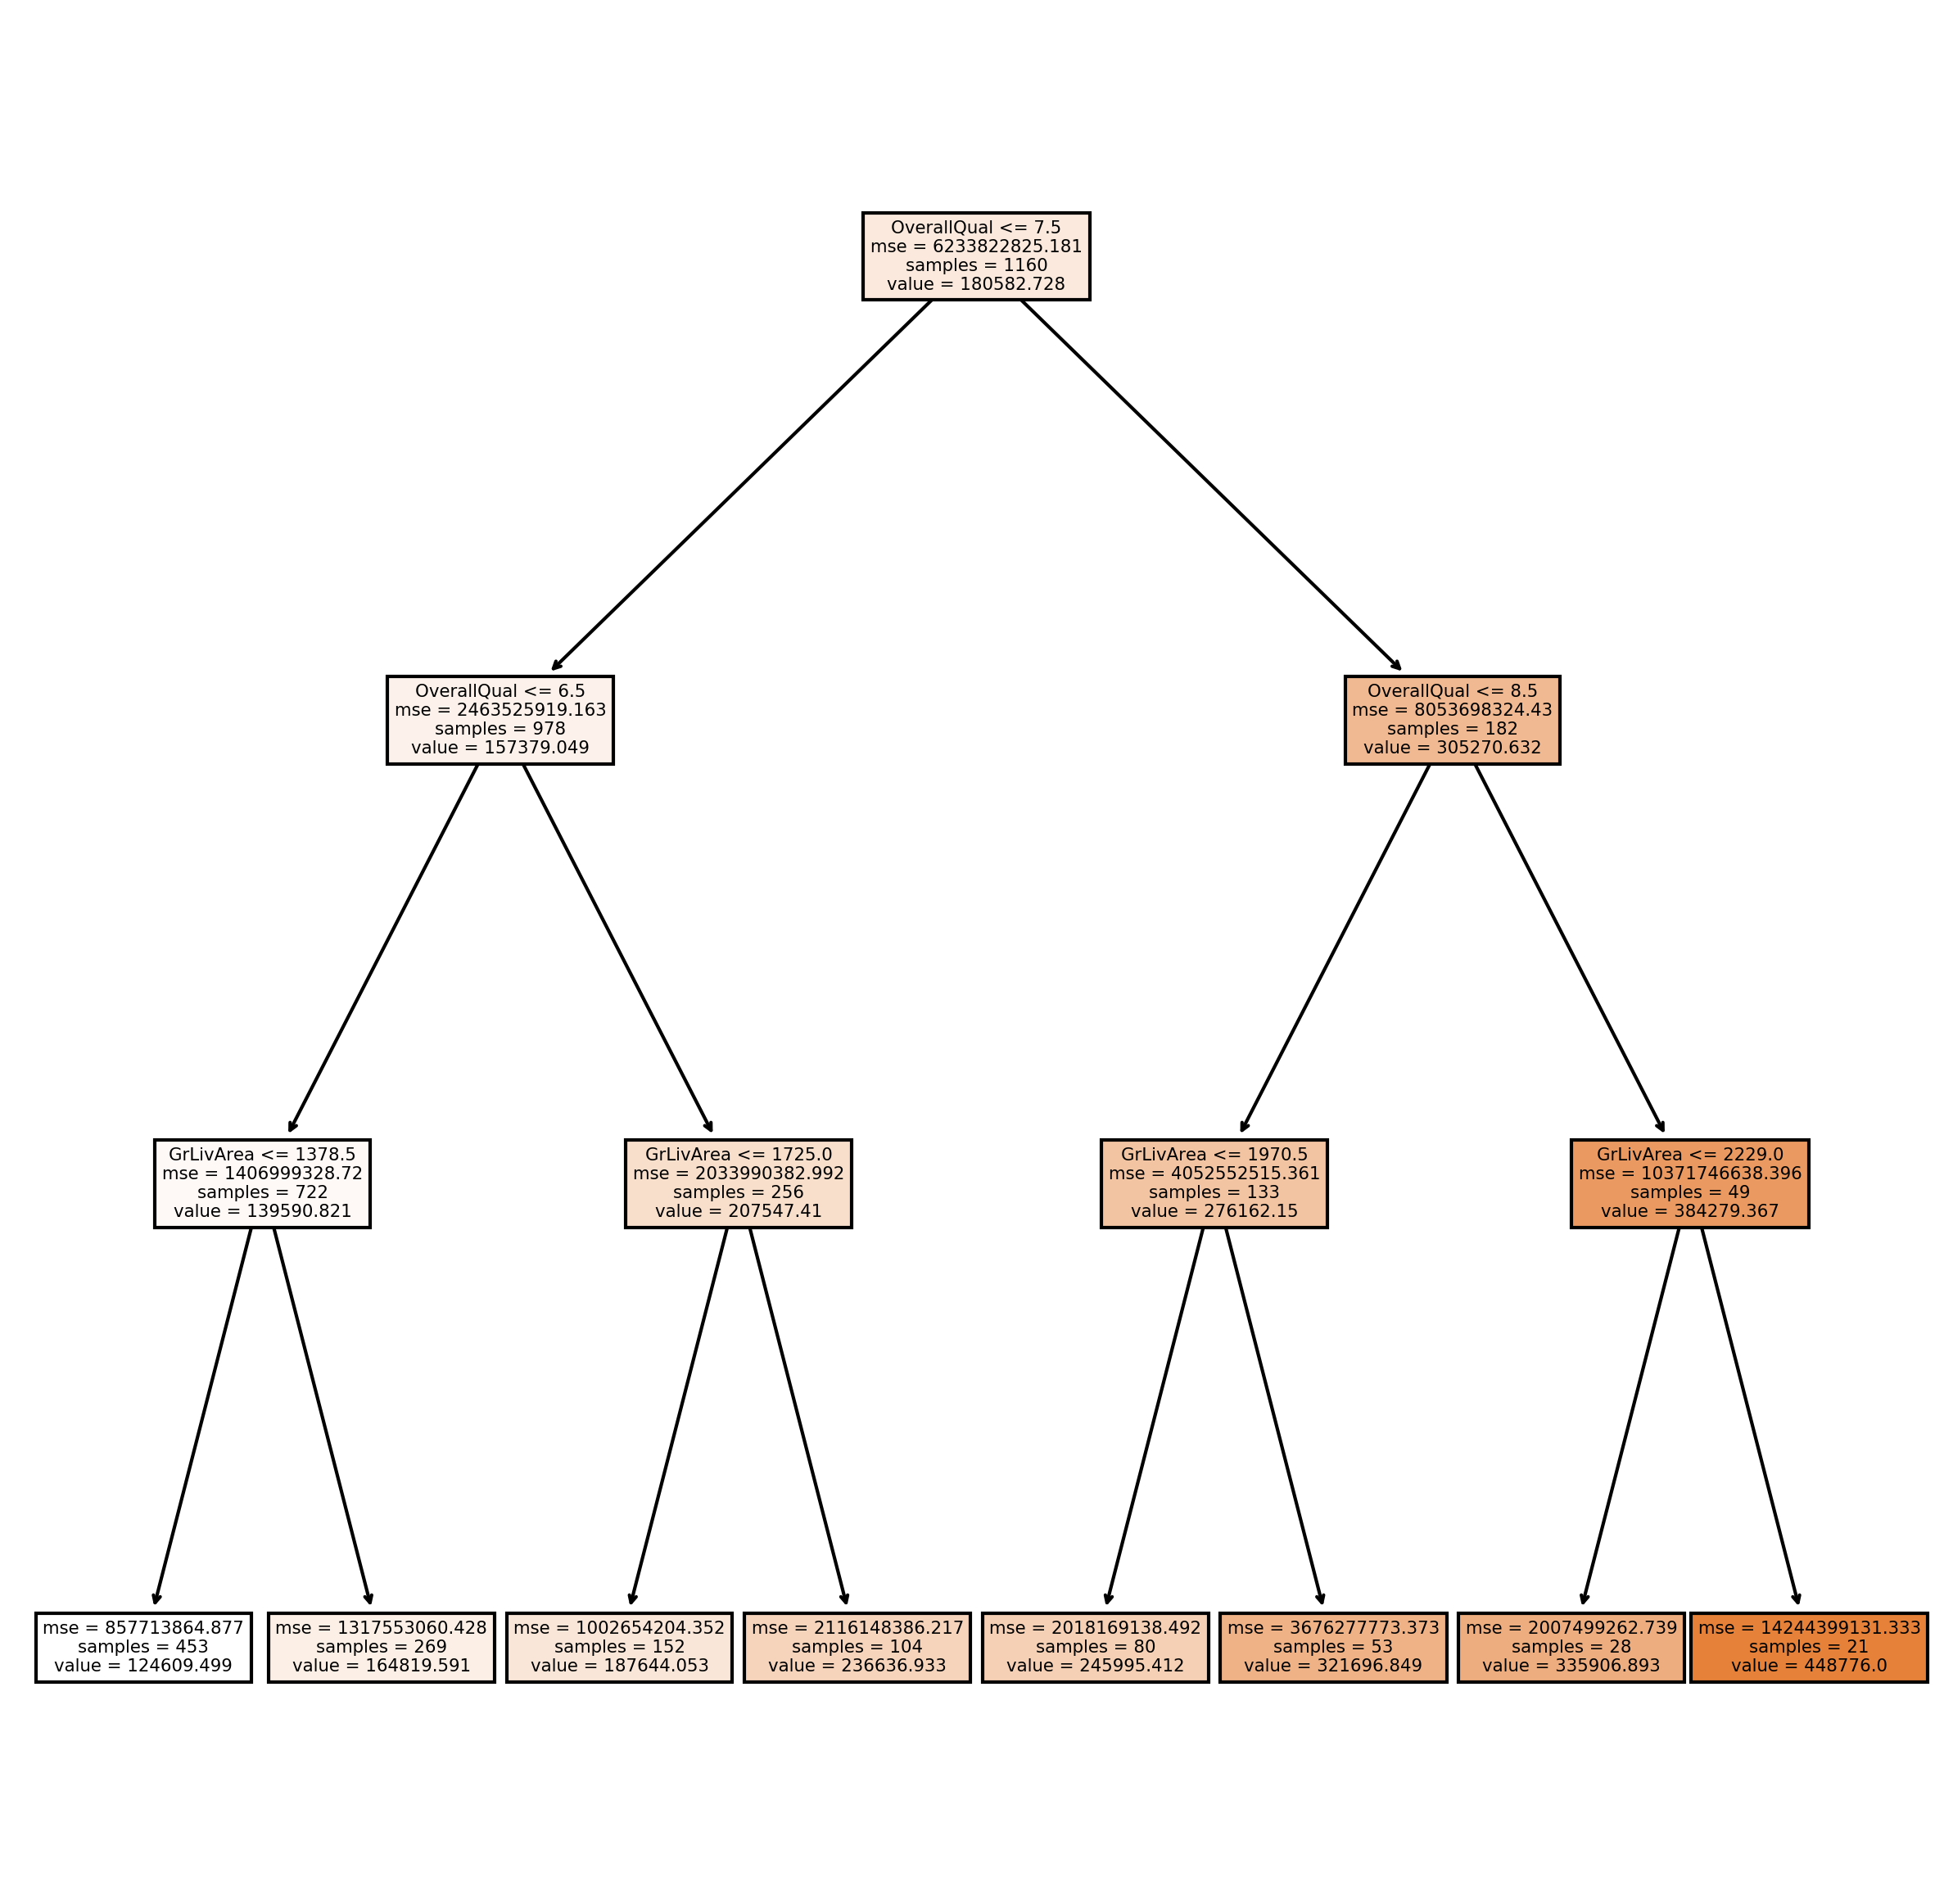

In [1025]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(estimator, feature_names=df.columns,filled=True);

### Creating Tree with Maximum Depth

In [1026]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.0
RMSE of validation set 49085.62542347131


## Bagging

In [1027]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageArea_na,WoodDeckSF_na,OpenPorchSF_na,EnclosedPorch_na,3SsnPorch_na,ScreenPorch_na,PoolArea_na,MiscVal_na,MoSold_na,YrSold_na
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,False,False,False,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,False,False,False,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,1156,20,4,90.0,10768,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
1156,1157,80,4,85.0,9350,2,0,4,4,1,...,False,False,False,False,False,False,False,False,False,False
1157,1158,120,4,34.0,5001,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
1158,1159,20,4,92.0,11932,2,0,4,4,1,...,False,False,False,False,False,False,False,False,False,False


In [1028]:
# This model consists of bunch of trees 
# But selection of features are not random
# It only uses bootstap
# It will create 10 trees by default
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 11170.407338142108
RMSE of validation set 34730.48393583128


### Exploring Effect of Adding More Trees 

In [1029]:
y_valid.shape

(300,)

In [1030]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 13159.043696538007
RMSE of validation set 35907.12377052602


In [1031]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 12067.153005318496
RMSE of validation set 37045.825328578714


In [1032]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 11224.396580948396
RMSE of validation set 36773.94342810715


## Reducing over-fitting

### Subsampling

In [1033]:
from sklearn.ensemble import forest

In [1034]:
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

In [1035]:
def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

In [1036]:
set_rf_samples(300)

In [1037]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 2.69 s, sys: 43.9 ms, total: 2.74 s
Wall time: 996 ms
RMSE of train set 10996.413947153198
RMSE of validation set 35225.27953069804


In [1038]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 11786.54835291873
RMSE of validation set 33854.51083207721


In [1039]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)


RMSE of train set 11295.614768124584
RMSE of validation set 34265.21961557224


### Tree building parameters

In [1040]:
reset_rf_samples()

In [1041]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

### Using Bootstraping and More Trees than Default

In [1042]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 11748.584214556826
RMSE of validation set 35002.46614211772


In [1043]:
t=m.estimators_[0].tree_

In [1044]:
dectree_max_depth(t)

20

### Using min_sample_leaf

In [1045]:
# It will train more quickly because it will be less deep
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 15967.979301907839
RMSE of validation set 35876.218613043675


In [1046]:
t=m.estimators_[0].tree_

In [1047]:
dectree_max_depth(t)

16

In [1048]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 19780.947288684394
RMSE of validation set 36494.72389935015


In [1049]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 16265.993137118558
RMSE of validation set 33159.91694606806


In [1050]:
m.feature_importances_

array([6.34552512e-03, 2.83859417e-03, 9.20772511e-04, 3.77637386e-03,
       1.71750006e-02, 0.00000000e+00, 4.05569047e-04, 1.80665817e-03,
       4.37220363e-04, 0.00000000e+00, 7.24471423e-04, 9.69366299e-04,
       4.77393266e-03, 2.17396519e-04, 0.00000000e+00, 7.51375468e-04,
       5.55530908e-04, 3.29003077e-01, 3.40657359e-03, 5.50013834e-02,
       1.00075884e-02, 4.99711804e-04, 1.23480418e-03, 2.47933346e-03,
       1.15443702e-03, 5.58385422e-04, 4.77947373e-03, 2.00209364e-02,
       2.30194110e-04, 2.69359223e-04, 6.85003120e-03, 2.02827830e-04,
       2.11020069e-03, 1.32250920e-03, 1.67158761e-02, 1.58801505e-04,
       2.42494774e-04, 4.30451810e-03, 4.45435617e-02, 9.51803296e-06,
       5.53261197e-04, 1.96342717e-03, 2.04957512e-04, 3.57549949e-02,
       1.08191090e-02, 0.00000000e+00, 1.51418498e-01, 1.35363634e-03,
       2.32193633e-05, 1.82403691e-02, 1.48804549e-03, 3.21174125e-03,
       7.49466174e-04, 1.06644743e-02, 7.26809547e-03, 2.63665621e-04,
      

### Feature Importance

In [1078]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'columns':df.columns, 'importance':m.feature_importances_}
                       ).sort_values('importance', ascending=False)

In [1052]:
feature_importance=rf_feat_importance(m, train)

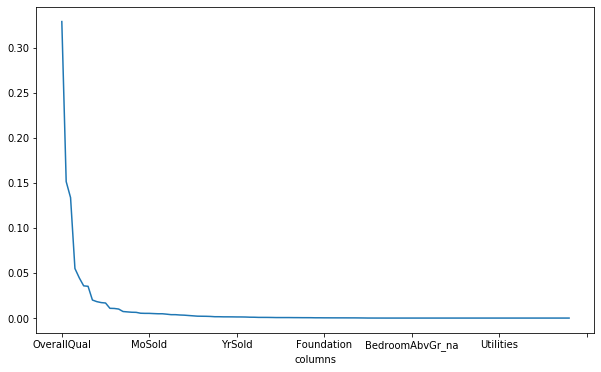

In [1053]:
feature_importance.plot('columns', 'importance', figsize=(10,6), legend=False)

In [1054]:
def plot_feature_importance(fi): 
    return fi.plot('columns', 'importance', 'barh', figsize=(12,7), legend=False)

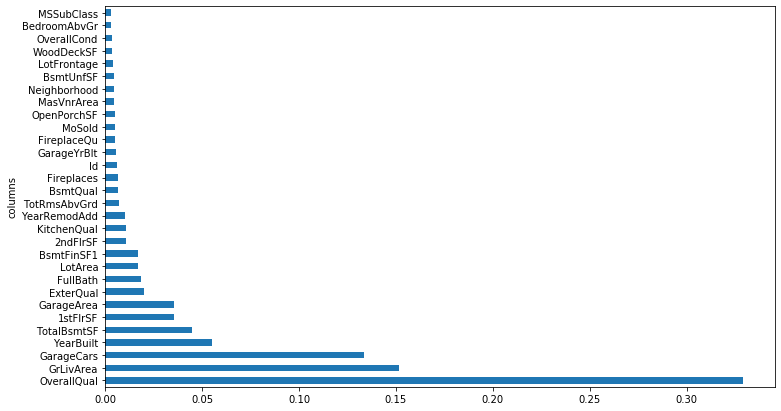

In [1055]:
plot_feature_importance(feature_importance[:30]);

In [1056]:
keep_columns = feature_importance[feature_importance["importance"]>0.005]["columns"]; 
len(keep_columns)

21

In [1057]:
df_keep = train[keep_columns].copy()

In [1058]:
X_train, X_valid = split_train_val(df_keep, n_train)
y_train, y_valid = split_train_val(y, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1160, 21), (1160,), (300, 21), (300,))

In [1060]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 17659.172772147995
RMSE of validation set 35521.93241124666


* **This time I selected the features have importance higher than 0.01**.

In [1061]:
keep_columns = feature_importance[feature_importance["importance"]>0.01]["columns"]; 
len(keep_columns)

df_keep1 = train[keep_columns].copy()

In [1062]:
X_train, X_valid = split_train_val(df_keep1, n_train)
y_train, y_valid = split_train_val(y, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1160, 14), (1160,), (300, 14), (300,))

In [1063]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 18672.932300670076
RMSE of validation set 35004.949185678735


**RMSE improved!**

In [1065]:
from scipy.cluster import hierarchy as hc
import scipy


scipy.stats.spearmanr(df_keep1).correlation

array([[ 1.        ,  0.60326236,  0.60875562,  0.64739196,  0.45991522,
         0.40872967,  0.54155239, -0.67037368,  0.57637168,  0.23330333,
         0.13295687,  0.28956104, -0.57353507,  0.55772303],
       [ 0.60326236,  1.        ,  0.50509432,  0.28849302,  0.37102569,
         0.4944212 ,  0.46821141, -0.41649109,  0.65841924,  0.44903951,
         0.05747074,  0.64285668, -0.38222991,  0.28240025],
       [ 0.60875562,  0.50509432,  1.        ,  0.60151893,  0.45550789,
         0.45057972,  0.85331738, -0.50731232,  0.51831046,  0.34019528,
         0.18138082,  0.15649948, -0.41478508,  0.4562453 ],
       [ 0.64739196,  0.28849302,  0.60151893,  1.        ,  0.42718721,
         0.29336321,  0.52828135, -0.6353461 ,  0.53741957,  0.103385  ,
         0.18964472,  0.02971596, -0.48545357,  0.68438789],
       [ 0.45991522,  0.37102569,  0.45550789,  0.42718721,  1.        ,
         0.82929193,  0.48668544, -0.39361035,  0.32803647,  0.36619656,
         0.41041261, -0.28

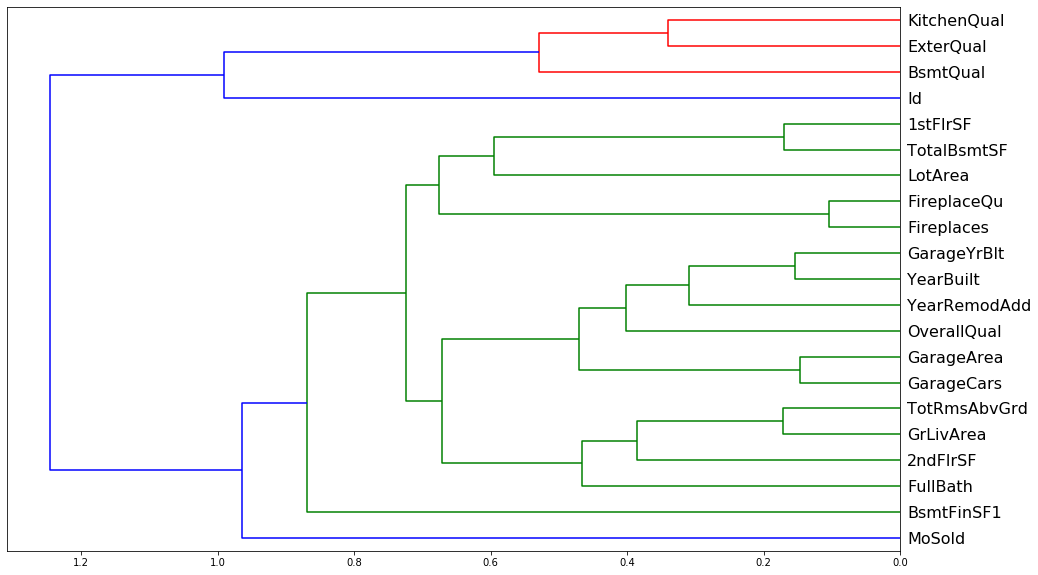

In [1066]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

It seems that there is no similar features to remove.

## Adding New Features

In [1082]:
train['TotalSF'] = train['TotalBsmtSF'] + train['GrLivArea']
train['TotalFloorSF'] = train['1stFlrSF'] + train['2ndFlrSF']
train['TotalPorchSF'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']


test['TotalSF'] = test['TotalBsmtSF'] + test['GrLivArea']
test['TotalFloorSF'] = test['1stFlrSF'] + test['2ndFlrSF']
test['TotalPorchSF'] = test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']

In [1083]:
X_train, X_valid = split_train_val(train, n_train)
y_train, y_valid = split_train_val(y, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1160, 120), (1160,), (300, 120), (300,))

In [1084]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 16169.091523751606
RMSE of validation set 33909.59887615055


In [1085]:
feature_importance=rf_feat_importance(m, train)

In [1096]:
feature_importance[:20]

,columns,importance
117,TotalSF,0.363046
17,OverallQual,0.230127
19,YearBuilt,0.069469
46,GrLivArea,0.055991
61,GarageCars,0.047970
118,TotalFloorSF,0.043787
62,GarageArea,0.016368
53,KitchenQual,0.014192
34,BsmtFinSF1,0.013415
4,LotArea,0.012065


* TotalSF looks like the most important feature. I will try another df with these important features.

In [1106]:
keep_columns = feature_importance[feature_importance["importance"]>0.005]["columns"]; 
len(keep_columns)

df_keep1 = train[keep_columns].copy()

In [1107]:
X_train, X_valid = split_train_val(df_keep1, n_train)
y_train, y_valid = split_train_val(y, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1160, 17), (1160,), (300, 17), (300,))

In [1092]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 17772.67978638428
RMSE of validation set 34025.18399805231


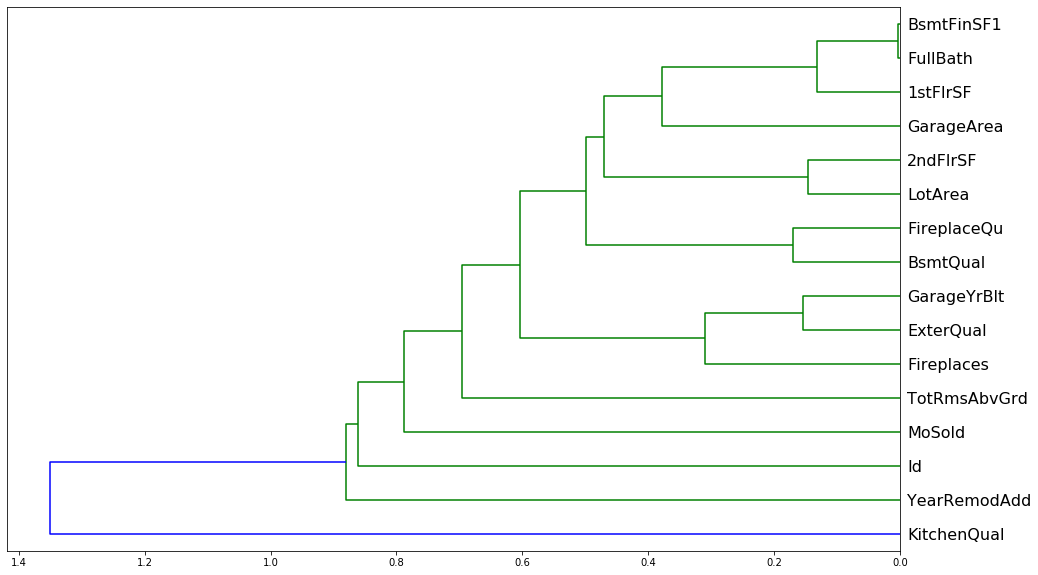

In [1105]:
corr = np.round(scipy.stats.spearmanr(df_keep1).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [1127]:
X_train, X_valid = split_train_val(df_keep1, n_train)
y_train, y_valid = split_train_val(y, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1160, 17), (1160,), (300, 17), (300,))

In [1109]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 17661.474095264635
RMSE of validation set 33958.51256973915


**"RMSE of validation set 33958" is the best score that we had.**

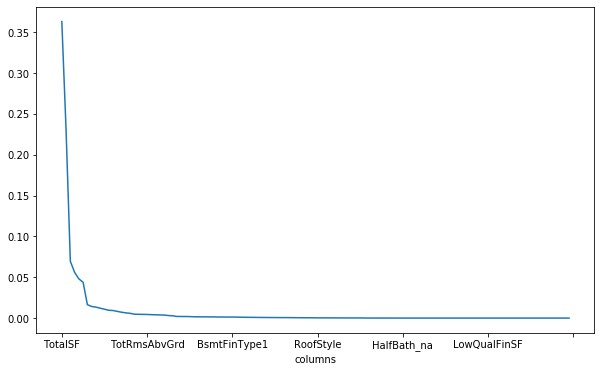

In [1148]:
feature_importance.plot('columns', 'importance', figsize=(10,6), legend=False)